In [1]:
import requests
import json
import pandas as pd
from Bio import pairwise2
import re
import matplotlib.pyplot as plt

ensembl_server = 'http://rest.ensembl.org'

def get_ENS_gene_id(gene,species='mouse'):
    '''Take a gene of interest and return the ensembl gene id'''       
    server = 'http://mygene.info/v3'
    query_settings = f'fields=ensembl.gene&species={species}&size=1000'
    endpoint = f'/query?q={gene}&{query_settings}'
    r = requests.get(server+endpoint)
    r = r.json()
    return r['hits'][0]['ensembl']['gene']


def get_homologs(ens_id):
    '''return dataframe c'''
    #homology query
    homology_endpoint = f"/homology/id/{ens_id}?"
    query_settings = f'fields=ensembl.gene&species={species}&size=1000'

    r = requests.get(ensembl_server+homology_endpoint, headers={ "Content-Type" : "application/json"})
    r = r.json()
  
    #parse query
    homologous_protein_ids = [ r['data'][0]['homologies'][i]['target']['protein_id'] for i in range(0,len(r['data'][0]['homologies']))]
    perc_ids = [ r['data'][0]['homologies'][i]['target']['perc_id'] for i in range(0,len(r['data'][0]['homologies']))]
    align_seqs = [ r['data'][0]['homologies'][i]['target']['align_seq'] for i in range(0,len(r['data'][0]['homologies']))]
    perc_pos_list = [ r['data'][0]['homologies'][i]['target']['perc_pos'] for i in range(0,len(r['data'][0]['homologies']))]
    species_list = [ r['data'][0]['homologies'][i]['target']['species'] for i in range(0,len(r['data'][0]['homologies']))]

    #write df
    df = pd.DataFrame({'ProteinIDs' : homologous_protein_ids,'%Identity'  : perc_ids,
                       'Align Sequences' : align_seqs,'%Pos' : perc_pos_list, 
                       'Species' : species_list})

    return df


In [9]:
gene='tdt'
species = 'mouse'
ens_id = get_ENS_gene_id('tdt')
seq_endpoint = f"/sequence/id/{ens_id}?"
query_settings = f'db_type=core;type=protein;content-type=application/json;object_type=predictiontranscript;species={species}'

r = requests.get(ensembl_server+seq_endpoint, headers={ "Content-Type" : "application/json"})
r = r.json()
r

{'molecule': 'dna',
 'seq': 'CTCCCGTGACGTCACGGCGCCGCTTTCCGGTGGCTGAGTCGAGCTGAGGTTGTTGTGGGCCGGGGGGCGCCATGGGGGCGACTGGCGACACCGAGCAGCCGCGGGGCCCCGGCGGGGCGGAGCGAGGTGGCCTGGAGCTGGGCGACGCGGGCGCGGCGGGCCAGCCGGTTCTCACGGTGAGGGCGCCCGGGCGAGGCCGGGGCTCGGGCCGGGCAGGGCCTCGGGCTCCCGGGCCCCGGGCCCGCGGGCGAAAGAACGCGGCGGCCGTGCGGCCCTGGGAATGTCGTTTTCTCAGTGCCGCTACAAGCTGGATTCAGATTGTAGCTAGGTGACGTGGGCCTGATGTGACACCCTCTGAGCGCCAGGTTTCTCTTCTGTGAAATGAACAGCAATAACCCGAGCTTGCTGGAGTTGTGGTGGGATGGGCTGATAAAGGCGGGTAGAACGCCCTGACTCGTCACCCGCCTCATAGTAGACCCTAGGTAAACACTGCTGCCCTTCCTCTTGCTCTTCCAGAAAAAGCGAGCTTTGGACATTGGTGACAGAAAACATTTTCCCAGTTCCTCCACCCTGACAGGGTCTTCCAGCCACTGAATTAATTCCCCTTCACCCCAAGGTGGGAGAAGTGAGAAGCAGGAACGTCTAGGTTTAGCGCCATACTCACTTTCTCCTCATCCTCACTATGAGAAGCCTCGGTGACATTTGCCCACTTGGTCCCCAACAGAACCCTTGGAACATAATGATAAAACATCGGCAGGTGCAGCGAAGGGGCCGCCGATCTCAGATGACCACAAGGTAAGGCTCGACCTGGGTGAGACCTGAGATCCAGTTGTGTGGACTGCAGTGAGTGCTTTGGGAACCCCACTGTAGGAGTCTGAGATCAACAGCCCGTAAAGAGCACAGGAGTGGGGAGGCTGTAACTTCCTGTCACCTTGTCAGGTCCACATCCTAACCAAGCAGGGAAGGAATGA

In [3]:
ens_id = get_ENS_gene_id('tdt')
ens_id

'ENSMUSG00000017299'

In [40]:
df#.head(50)

,ProteinIDs,%Identity,Align Sequences,%Pos,Species
0,MGP_PahariEiJ_P0067069,98.7805,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,99.3902,mus_pahari
1,ENSMSIP00000026484,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_spicilegus
2,ENSRNOP00000020280,86.4362,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTVRAPGRGRGSG...,86.4362,rattus_norvegicus
3,MGP_SPRETEiJ_P0058249,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_spretus
4,ENSOANP00000033653,45.8252,MGTSRGRDPPRGPQP-------GGDGPAVGP----SPWNVMIKHRQ...,51.4563,ornithorhynchus_anatinus
...,...,...,...,...,...
207,MGP_AKRJ_P0059148,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_musculus_akrj
208,MGP_C3HHeJ_P0058835,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_musculus_c3hhej
209,MGP_NZOHlLtJ_P0059793,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_musculus_nzohlltj
210,MGP_WSBEiJ_P0058111,100.0000,MGATGDTEQPRGPGGAERGGLELGDAGAAGQPVLTNPWNIMIKHRQ...,100.0000,mus_musculus_wsbeij


In [8]:
gene = 'hck'
ens_id = get_ENS_gene_id(gene,species='mouse')

print(ens_id)

#get homology data and write to text
homology_endpoint = f"/homology/id/{ens_id}?"
r = requests.get(ensembl_server+homology_endpoint, headers={ "Content-Type" : "application/json"})
r = r.json()

ENSMUSG00000003283


In [61]:

server = 'https://blast.ncbi.nlm.nih.gov/Blast.cgi'
query_settings = f'&PROGRAM=blastp&CMD=Put&FORMAT_TYPE=JSON2'
endpoint = f'?QUERY={ens_id}{query_settings}'


r = requests.get(server+endpoint)


In [1]:
from Bio.Blast import NCBIWWW

hck_aa = 'MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNSMPPGFVEGSEDTIVVALYDYEAIHREDLSFQKGDQMVVLEEAGEWWKARSLATKKEGYIPSNYVARVNSLETEEWFFKGISRKDAERHLLAPGNMLGSFMIRDSETTKGSYSLSVRDFDPQHGDTVKHYKIRTLDSGGFYISPRSTFSSLQELVLHYKKGKDGLCQKLSVPCVSPKPQKPWEKDAWEIPRESLQMEKKLGAGQFGEVWMATYNKHTKVAVKTMKPGSMSVEAFLAEANLMKSLQHDKLVKLHAVVSQEPIFIVTEFMAKGSLLDFLKSEEGSKQPLPKLIDFSAQISEGMAFIEQRNYIHRDLRAANILVSASLVCKIADFGLARIIEDNEYTAREGAKFPIKWTAPEAINFGSFTIKSDVWSFGILLMEIVTYGRIPYPGMSNPEVIRALEHGYRMPRPDNCPEELYNIMIRCWKNRPEERPTFEYIQSVLDDFYTATESQYQQQP'

result_handle = NCBIWWW.qblast("blastp", "nr", hck_aa, hitlist_size=10)

In [2]:
from Bio.Blast import NCBIXML,ParseBlastTable

#ParseBlastTable.BlastTableEntry()
#blast_records = NCBIXML.BlastParser(result_handle)

blast_records = NCBIXML.parse(result_handle)
blast_records

<generator object parse at 0x7f5619590510>

In [32]:
small_record = NCBIXML.read(result_handle)
small_record

ValueError: Your XML file was empty

In [34]:
blast_records = list(blast_records)
blast_records



ValueError: Your XML file was empty

In [30]:
[print(record) for record in list(blast_records)]

[None]

In [5]:
columns = ['Title','Hit ID','Hit Def','Length','Score','Bits','Expect','Num Alignments','Identities','Positives','Gaps','Align Length','Strand','Frame','Query','Query Start','Query End','Match','Subject','Subject Start','Subject End']
rows = []

E_VALUE_THRESH = 0.00000000001 
count = 0
for record in blast_records:
    for alignment in record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_VALUE_THRESH:
                count += 1
                print("****Alignment****")
                print("sequence:", alignment.title)
                print("length:", alignment.length)
                print(hsp.query[0:75] + "...")
                print(hsp.match[0:75] + "...")
                print(hsp.sbjct[0:75] + "...")
                print()


                #append to rows
                rows.append([alignment.title,alignment.hit_id,alignment.hit_def,alignment.length,hsp.score,hsp.bits,hsp.expect,hsp.num_alignments,hsp.identities,hsp.positives,hsp.gaps,hsp.align_length,hsp.strand,hsp.frame,hsp.query,hsp.query_start,hsp.query_end,hsp.match,hsp.sbjct,hsp.sbjct_start,hsp.sbjct_end])

            
print(f"There are {count} similar sequences in Blast output")

blast_df = pd.DataFrame(rows,columns=columns)


There are 0 similar sequences in Blast output


In [7]:
import requests
import json
import pandas as pd
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

hck_aa = 'MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNSMPPGFVEGSEDTIVVALYDYEAIHREDLSFQKGDQMVVLEEAGEWWKARSLATKKEGYIPSNYVARVNSLETEEWFFKGISRKDAERHLLAPGNMLGSFMIRDSETTKGSYSLSVRDFDPQHGDTVKHYKIRTLDSGGFYISPRSTFSSLQELVLHYKKGKDGLCQKLSVPCVSPKPQKPWEKDAWEIPRESLQMEKKLGAGQFGEVWMATYNKHTKVAVKTMKPGSMSVEAFLAEANLMKSLQHDKLVKLHAVVSQEPIFIVTEFMAKGSLLDFLKSEEGSKQPLPKLIDFSAQISEGMAFIEQRNYIHRDLRAANILVSASLVCKIADFGLARIIEDNEYTAREGAKFPIKWTAPEAINFGSFTIKSDVWSFGILLMEIVTYGRIPYPGMSNPEVIRALEHGYRMPRPDNCPEELYNIMIRCWKNRPEERPTFEYIQSVLDDFYTATESQYQQQP'


def generate_blastp_df(sequence,eval_thresh=0.00000000001 ):
    '''Run BLAST on query and generate dataframe'''
    columns = ['Title','Hit ID','Hit Def','Length','Score','Bits','Expect','Num Alignments','Identities','Positives','Gaps','Align Length','Strand','Frame','Query','Query Start','Query End','Match','Subject','Subject Start','Subject End']
    rows = []
    
    #generate blast query
    print(f'Running BLASTP for query {sequence} ...')
    result_handle = NCBIWWW.qblast("blastp", "nr", sequence, hitlist_size=1000)
    blast_records = NCBIXML.parse(result_handle)

    count = 0
    with open('blast_alignments.txt','w') as file:
        for record in blast_records:
            for alignment in record.alignments:
                for hsp in alignment.hsps:
                    if hsp.expect < eval_thresh:
                        count += 1
                        file.write("****Alignment****\n")
                        file.write(f"sequence: {alignment.title}\n")
                        file.write(f"length: {alignment.length} \n")
                        file.write(f"{hsp.query}\n")
                        file.write(f"{hsp.match}\n")
                        file.write(f"{hsp.sbjct}\n")

                        #append to rows
                        rows.append([alignment.title,alignment.hit_id,alignment.hit_def,alignment.length,hsp.score,hsp.bits,hsp.expect,hsp.num_alignments,hsp.identities,hsp.positives,hsp.gaps,hsp.align_length,hsp.strand,hsp.frame,hsp.query,hsp.query_start,hsp.query_end,hsp.match,hsp.sbjct,hsp.sbjct_start,hsp.sbjct_end])
                
    print(f"There are {count} similar sequences in Blast output")
    blast_df = pd.DataFrame(rows,columns=columns)
    blast_df.to_csv('blast_results.csv')

    return blast_df



blast_df = generate_blastp_df(hck_aa)
blast_df

Running BLASTP for query MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNSMPPGFVEGSEDTIVVALYDYEAIHREDLSFQKGDQMVVLEEAGEWWKARSLATKKEGYIPSNYVARVNSLETEEWFFKGISRKDAERHLLAPGNMLGSFMIRDSETTKGSYSLSVRDFDPQHGDTVKHYKIRTLDSGGFYISPRSTFSSLQELVLHYKKGKDGLCQKLSVPCVSPKPQKPWEKDAWEIPRESLQMEKKLGAGQFGEVWMATYNKHTKVAVKTMKPGSMSVEAFLAEANLMKSLQHDKLVKLHAVVSQEPIFIVTEFMAKGSLLDFLKSEEGSKQPLPKLIDFSAQISEGMAFIEQRNYIHRDLRAANILVSASLVCKIADFGLARIIEDNEYTAREGAKFPIKWTAPEAINFGSFTIKSDVWSFGILLMEIVTYGRIPYPGMSNPEVIRALEHGYRMPRPDNCPEELYNIMIRCWKNRPEERPTFEYIQSVLDDFYTATESQYQQQP ...
There are 1000 similar sequences in Blast output


,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Align Length,Strand,Frame,Query,Query Start,Query End,Match,Subject,Subject Start,Subject End
0,ref|NP_034537.2| tyrosine-protein kinase HCK i...,ref|NP_034537.2|,tyrosine-protein kinase HCK isoform p59Hck [Mu...,524,2827.0,1093.570,0.0,None,524,524,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.090,0.0,None,516,522,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.850,0.0,None,515,520,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.990,0.0,None,509,517,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.220,0.0,None,507,517,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,gb|NXS68333.1| LYN kinase [Pandion haliaetus],gb|NXS68333.1|,LYN kinase [Pandion haliaetus],513,1975.0,765.377,0.0,None,362,436,...,513,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L K +P + +YV DPTS+ + P N...,MGCIKSKRKENLHGDGLDLKNQPVRKTERTIYVRDPTSNKQQRPVN...,1,513
996,ref|XP_018079217.1| tyrosine-protein kinase Ly...,ref|XP_018079217.1|,tyrosine-protein kinase Lyn isoform X1 [Xenopu...,508,1975.0,765.377,0.0,None,357,434,...,508,"(None, None)","(0, 0)",MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,22,524,MGC+KSR + K P +YVPDPT+ + + ++S...,MGCIKSRTANPQDEMGKNNPVRKNDRTIYVPDPTAKLQRPVSRTSS...,1,508
997,ref|XP_038203169.1| tyrosine-protein kinase Ly...,ref|XP_038203169.1|,tyrosine-protein kinase Lyn isoform X1 [Arvico...,512,1975.0,765.377,0.0,None,361,433,...,512,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P +...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVS...,1,512
998,ref|XP_052031976.1| tyrosine-protein kinase Ly...,ref|XP_052031976.1|,tyrosine-protein kinase Lyn isoform X1 [Apodem...,512,1975.0,765.377,0.0,None,362,432,...,512,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P ...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVP...,1,512


In [13]:
print(columns)
blast_df.head(5)

#blast_df['Query']

['Title', 'Hit ID', 'Hit Def', 'Length', 'Score', 'Bits', 'Expect', 'Num Alignments', 'Identities', 'Positives', 'Gaps', 'Align Length', 'Strand', 'Frame', 'Query', 'Query Start', 'Query End', 'Match', 'Subject', 'Subject Start', 'Subject End']


,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Align Length,Strand,Frame,Query,Query Start,Query End,Match,Subject,Subject Start,Subject End
0,ref|NP_034537.2| tyrosine-protein kinase HCK i...,ref|NP_034537.2|,tyrosine-protein kinase HCK isoform p59Hck [Mu...,524,2827.0,1093.57,0.0,None,524,524,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.09,0.0,None,516,522,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.85,0.0,None,515,520,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.99,0.0,None,509,517,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.22,0.0,None,507,517,...,524,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639


In [19]:
aa_sequence = 'MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNSMPPGFVEGSEDTIVVALYDYEAIHREDLSFQKGDQMVVLEEAGEWWKARSLATKKEGYIPSNYVARVNSLETEEWFFKGISRKDAERHLLAPGNMLGSFMIRDSETTKGSYSLSVRDFDPQHGDTVKHYKIRTLDSGGFYISPRSTFSSLQELVLHYKKGKDGLCQKLSVPCVSPKPQKPWEKDAWEIPRESLQMEKKLGAGQFGEVWMATYNKHTKVAVKTMKPGSMSVEAFLAEANLMKSLQHDKLVKLHAVVSQEPIFIVTEFMAKGSLLDFLKSEEGSKQPLPKLIDFSAQISEGMAFIEQRNYIHRDLRAANILVSASLVCKIADFGLARIIEDNEYTAREGAKFPIKWTAPEAINFGSFTIKSDVWSFGILLMEIVTYGRIPYPGMSNPEVIRALEHGYRMPRPDNCPEELYNIMIRCWKNRPEERPTFEYIQSVLDDFYTATESQYQQQP'



def calc_local_alignment_score(seqA,seqB):
    alignments = pairwise2.align.localxx(seqA,seqB)
    score = alignments[0][2]
    return score

blast_df["Local Aln Score"] = [ calc_local_alignment_score(aa_sequence, match_seq) for match_seq in list(blast_df['Match'])]

blast_df





,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Strand,Frame,Query,Query Start,Query End,Match,Subject,Subject Start,Subject End,Local Aln Score
0,ref|NP_034537.2| tyrosine-protein kinase HCK i...,ref|NP_034537.2|,tyrosine-protein kinase HCK isoform p59Hck [Mu...,524,2827.0,1093.570,0.0,None,524,524,...,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,524.0
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.090,0.0,None,516,522,...,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634,516.0
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.850,0.0,None,515,520,...,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634,515.0
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.990,0.0,None,509,517,...,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524,509.0
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.220,0.0,None,507,517,...,"(None, None)","(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,gb|NXS68333.1| LYN kinase [Pandion haliaetus],gb|NXS68333.1|,LYN kinase [Pandion haliaetus],513,1975.0,765.377,0.0,None,362,436,...,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L K +P + +YV DPTS+ + P N...,MGCIKSKRKENLHGDGLDLKNQPVRKTERTIYVRDPTSNKQQRPVN...,1,513,362.0
996,ref|XP_018079217.1| tyrosine-protein kinase Ly...,ref|XP_018079217.1|,tyrosine-protein kinase Lyn isoform X1 [Xenopu...,508,1975.0,765.377,0.0,None,357,434,...,"(None, None)","(0, 0)",MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,22,524,MGC+KSR + K P +YVPDPT+ + + ++S...,MGCIKSRTANPQDEMGKNNPVRKNDRTIYVPDPTAKLQRPVSRTSS...,1,508,357.0
997,ref|XP_038203169.1| tyrosine-protein kinase Ly...,ref|XP_038203169.1|,tyrosine-protein kinase Lyn isoform X1 [Arvico...,512,1975.0,765.377,0.0,None,361,433,...,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P +...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVS...,1,512,361.0
998,ref|XP_052031976.1| tyrosine-protein kinase Ly...,ref|XP_052031976.1|,tyrosine-protein kinase Lyn isoform X1 [Apodem...,512,1975.0,765.377,0.0,None,362,432,...,"(None, None)","(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P ...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVP...,1,512,362.0


In [21]:
'''is local aln score the same val as identities?'''

blast_df.loc[ blast_df['Identities'] != blast_df['Local Aln Score']   ] #Answer: yes it is 



,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Strand,Frame,Query,Query Start,Query End,Match,Subject,Subject Start,Subject End,Local Aln Score


In [32]:
blast_df['%Identity'] = [ float(x/(len(aa_sequence)))*100 for x in list(blast_df['Identities'])]

blast_df.head(10)

,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Query End,Match,Subject,Subject Start,Subject End,Local Aln Score,%Identity,Scientific Name,Genus,Species
0,ref|NP_034537.2| tyrosine-protein kinase HCK i...,ref|NP_034537.2|,tyrosine-protein kinase HCK isoform p59Hck [Mu...,524,2827.0,1093.57,0.0,None,524,524,...,524,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,524.0,100.000000,synthetic construct,synthetic,construct
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.09,0.0,None,516,522,...,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634,516.0,98.473282,mus caroli,mus,caroli
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.85,0.0,None,515,520,...,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634,515.0,98.282443,mus pahari,mus,pahari
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.99,0.0,None,509,517,...,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524,509.0,97.137405,rattus norvegicus,rattus,norvegicus
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.22,0.0,None,507,517,...,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639,507.0,96.755725,mastomys coucha,mastomys,coucha
5,ref|NP_001165588.1| tyrosine-protein kinase HC...,ref|NP_001165588.1|,tyrosine-protein kinase HCK isoform p56Hck [Mu...,503,2710.0,1048.50,0.0,None,503,503,...,524,MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,1,503,503.0,95.992366,mus musculus,mus,musculus
6,ref|XP_028630818.1| tyrosine-protein kinase HC...,ref|XP_028630818.1|,tyrosine-protein kinase HCK [Grammomys surdaster],503,2676.0,1035.40,0.0,None,494,501,...,524,MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLG NNSNS...,MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGSNNSNS...,1,503,494.0,94.274809,grammomys surdaster,grammomys,surdaster
7,ref|XP_034352387.1| tyrosine-protein kinase HC...,ref|XP_034352387.1|,tyrosine-protein kinase HCK [Arvicanthis nilot...,503,2676.0,1035.40,0.0,None,493,502,...,524,MGCVKSRFLR+GSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,MGCVKSRFLREGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,1,503,493.0,94.083969,arvicanthis niloticus,arvicanthis,niloticus
8,gb|AAA41312.1| tyrosine kinase [Rattus norvegi...,gb|AAA41312.1|,tyrosine kinase [Rattus norvegicus] >gb|AAB207...,503,2658.0,1028.47,0.0,None,491,499,...,524,MGCVKSRFLR+GSKASK EP+ANQKGPVYVPDPTS KLGPN+ NS...,MGCVKSRFLREGSKASKIEPNANQKGPVYVPDPTSPKKLGPNSINS...,1,503,491.0,93.702290,rattus sp.,rattus,sp.
9,ref|XP_052039910.1| tyrosine-protein kinase HC...,ref|XP_052039910.1|,tyrosine-protein kinase HCK isoform X1 [Apodem...,507,2657.0,1028.08,0.0,None,492,500,...,524,AP MGCVKSRFLRDGSKASKTEP ANQKGPV+VPD TSSSKLGP+ ...,APGMGCVKSRFLRDGSKASKTEPGANQKGPVHVPDLTSSSKLGPST...,2,507,492.0,93.893130,apodemus sylvaticus,apodemus,sylvaticus


In [23]:
blast_df.sort_values('%Identity',ascending=True)

,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Frame,Query,Query Start,Query End,Match,Subject,Subject Start,Subject End,Local Aln Score,%Identity
996,ref|XP_018079217.1| tyrosine-protein kinase Ly...,ref|XP_018079217.1|,tyrosine-protein kinase Lyn isoform X1 [Xenopu...,508,1975.0,765.377,0.0,None,357,434,...,"(0, 0)",MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,22,524,MGC+KSR + K P +YVPDPT+ + + ++S...,MGCIKSRTANPQDEMGKNNPVRKNDRTIYVPDPTAKLQRPVSRTSS...,1,508,357.0,0.681298
952,ref|XP_043971714.1| tyrosine-protein kinase HC...,ref|XP_043971714.1|,tyrosine-protein kinase HCK isoform X3 [Gambus...,455,1999.0,774.622,0.0,None,358,416,...,"(0, 0)",SEDTIVVALYDYEAIHREDLSFQKGDQMVVLEEAGEWWKARSLATK...,76,524,+ +++ +AL+DYEAIH DL F+KGD++ +LEE+GEWW+A S++T ...,ASESVAIALFDYEAIHDGDLGFKKGDKLRILEESGEWWRAMSISTG...,7,455,358.0,0.683206
982,ref|XP_012820235.2| tyrosine-protein kinase Ly...,ref|XP_012820235.2|,tyrosine-protein kinase Lyn isoform X1 [Xenopu...,508,1978.0,766.533,0.0,None,359,435,...,"(0, 0)",MGCVKSRFLRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNNSNS...,22,524,MGC+KSR K P +YVPDPT+ + + + S...,MGCIKSRQSTPQDDMGKNNPVRKNDRTIYVPDPTAKLQRPVSRTPS...,1,508,359.0,0.685115
962,ref|XP_046199671.1| tyrosine-protein kinase HC...,ref|XP_046199671.1|,tyrosine-protein kinase HCK-like isoform X2 [O...,483,1990.0,771.155,0.0,None,360,420,...,"(0, 0)",PDPTSSSKLGPNNSNSMPPGFVEGSEDTIVVALYDYEAIHREDLSF...,52,524,P + + GP + ++ P ++I +ALYDYE ++ DL F...,PTTSKTPPQGPRLTLTVAPPVPSNGTESIAIALYDYEGVNDGDLGF...,11,483,360.0,0.687023
983,gb|NXC41590.1| LYN kinase [Penelope pileata],gb|NXC41590.1|,LYN kinase [Penelope pileata],513,1978.0,766.533,0.0,None,360,436,...,"(0, 0)",MGCVKSRF---LRDGSKASKTEPSANQKGPVYVPDPTSSSKLGPNN...,22,524,MGC+KS+ L K +P + +YV DPTS+ + P N...,MGCIKSKRKENLHGDGLDVKNQPVRKTERTIYVRDPTSNKQQRPGN...,1,513,360.0,0.687023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.220,0.0,None,507,517,...,"(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639,507.0,0.967557
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.990,0.0,None,509,517,...,"(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524,509.0,0.971374
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.850,0.0,None,515,520,...,"(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634,515.0,0.982824
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.090,0.0,None,516,522,...,"(0, 0)",MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634,516.0,0.984733


In [27]:
blast_df['Scientific Name'] = [re.findall('\[.*?\]',header)[-1].replace('[','').replace(']','').lower() for header in list(blast_df['Hit Def'])]
blast_df['Genus'] = [sciname.split(' ')[0] for sciname in list(blast_df['Scientific Name'])]
blast_df['Species'] = [sciname.split(' ')[1] for sciname in list(blast_df['Scientific Name'])]
blast_df

,Title,Hit ID,Hit Def,Length,Score,Bits,Expect,Num Alignments,Identities,Positives,...,Query End,Match,Subject,Subject Start,Subject End,Local Aln Score,%Identity,Scientific Name,Genus,Species
0,ref|NP_034537.2| tyrosine-protein kinase HCK i...,ref|NP_034537.2|,tyrosine-protein kinase HCK isoform p59Hck [Mu...,524,2827.0,1093.570,0.0,None,524,524,...,524,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,MGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,1,524,524.0,1.000000,synthetic construct,synthetic,construct
1,ref|XP_021037159.1| tyrosine-protein kinase HC...,ref|XP_021037159.1|,tyrosine-protein kinase HCK isoform X1 [Mus ca...,634,2792.0,1080.090,0.0,None,516,522,...,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTEPSANQK...,111,634,516.0,0.984733,mus caroli,mus,caroli
2,ref|XP_021047639.1| tyrosine-protein kinase HC...,ref|XP_021047639.1|,tyrosine-protein kinase HCK [Mus pahari],634,2781.0,1075.850,0.0,None,515,520,...,524,+GGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTE SANQK...,LGGRSSCEDPGCPRSEGRAPRMGCVKSRFLRDGSKASKTESSANQK...,111,634,515.0,0.982824,mus pahari,mus,pahari
3,ref|NP_037317.2| tyrosine-protein kinase HCK [...,ref|NP_037317.2|,tyrosine-protein kinase HCK [Rattus norvegicus...,524,2758.0,1066.990,0.0,None,509,517,...,524,MGGRSSCEDPGCPR EGR PRMGCVKSRFLR+GSKASK EP+ANQK...,MGGRSSCEDPGCPRGEGRVPRMGCVKSRFLREGSKASKIEPNANQK...,1,524,509.0,0.971374,rattus norvegicus,rattus,norvegicus
4,ref|XP_031228179.1| tyrosine-protein kinase HC...,ref|XP_031228179.1|,tyrosine-protein kinase HCK [Mastomys coucha],639,2756.0,1066.220,0.0,None,507,517,...,524,+GGRSSCEDPGCPR EG APRMGCVKS+FLRDGSKASKTEPSANQK...,LGGRSSCEDPGCPRGEGPAPRMGCVKSKFLRDGSKASKTEPSANQK...,116,639,507.0,0.967557,mastomys coucha,mastomys,coucha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,gb|NXS68333.1| LYN kinase [Pandion haliaetus],gb|NXS68333.1|,LYN kinase [Pandion haliaetus],513,1975.0,765.377,0.0,None,362,436,...,524,MGC+KS+ L K +P + +YV DPTS+ + P N...,MGCIKSKRKENLHGDGLDLKNQPVRKTERTIYVRDPTSNKQQRPVN...,1,513,362.0,0.690840,pandion haliaetus,pandion,haliaetus
996,ref|XP_018079217.1| tyrosine-protein kinase Ly...,ref|XP_018079217.1|,tyrosine-protein kinase Lyn isoform X1 [Xenopu...,508,1975.0,765.377,0.0,None,357,434,...,524,MGC+KSR + K P +YVPDPT+ + + ++S...,MGCIKSRTANPQDEMGKNNPVRKNDRTIYVPDPTAKLQRPVSRTSS...,1,508,357.0,0.681298,xenopus laevis,xenopus,laevis
997,ref|XP_038203169.1| tyrosine-protein kinase Ly...,ref|XP_038203169.1|,tyrosine-protein kinase Lyn isoform X1 [Arvico...,512,1975.0,765.377,0.0,None,361,433,...,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P +...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVS...,1,512,361.0,0.688931,microtus fortis,microtus,fortis
998,ref|XP_052031976.1| tyrosine-protein kinase Ly...,ref|XP_052031976.1|,tyrosine-protein kinase Lyn isoform X1 [Apodem...,512,1975.0,765.377,0.0,None,362,432,...,524,MGC+KS+ L D SKT+P N +YV DPTS+ + P ...,MGCIKSKRKDNLNDDGVDSKTQPVRNTDRTIYVRDPTSNKQQRPVP...,1,512,362.0,0.690840,apodemus sylvaticus,apodemus,sylvaticus


Text(0.5, 1.0, 'Percent Identity Histogram')

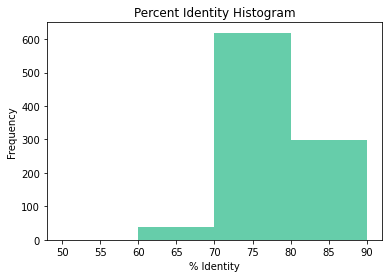

In [35]:
bins = [50.0, 60.0, 70.0, 80, 90]

plt.hist(blast_df['%Identity'],bins,color='mediumaquamarine')
plt.ylabel('Frequency')
plt.xlabel('% Identity')
plt.title('Percent Identity Histogram')

Text(0.5, 0.01, 'Percent Identity Bins')

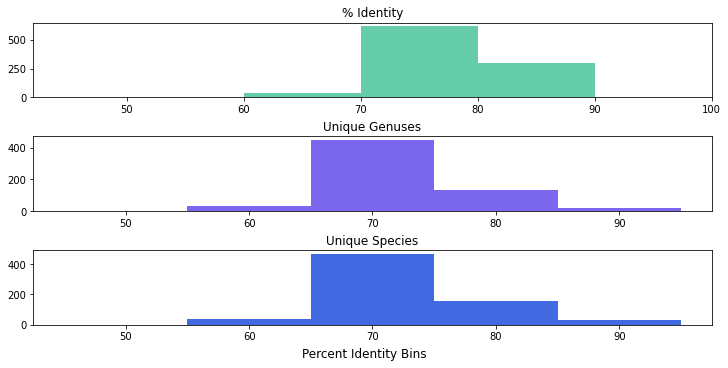

In [56]:
'''How many species within each bin? '''

bins = [50.0, 60.0, 70.0, 80, 90]


blast_df_50_60 = blast_df.loc[ blast_df['%Identity'] >= 50].loc[ blast_df['%Identity'] <60 ]
blast_df_60_70 = blast_df.loc[ blast_df['%Identity'] >= 60].loc[ blast_df['%Identity'] <70 ]
blast_df_70_80 = blast_df.loc[ blast_df['%Identity'] >= 70].loc[ blast_df['%Identity'] <80 ]
blast_df_80_90 = blast_df.loc[ blast_df['%Identity'] >= 80].loc[ blast_df['%Identity'] <90 ]
blast_df_90_100 = blast_df.loc[ blast_df['%Identity'] >= 90].loc[ blast_df['%Identity'] <100 ]


binned_dfs = [blast_df_50_60, blast_df_60_70, blast_df_70_80, blast_df_80_90, blast_df_90_100 ]

unique_genus_counts = [ len(b_df['Genus'].unique()) for b_df in binned_dfs]
unique_species_counts = [ len(b_df['Species'].unique()) for b_df in binned_dfs]


fig, [ax1, ax2, ax3] = plt.subplots(nrows=3,ncols=1, figsize= (10,5), constrained_layout = True)
axes = fig.get_axes()


# %identity hist
ax1.hist(blast_df['%Identity'],bins,color='mediumaquamarine')
ax1.set_xlim(42,100)
ax1.set_title('% Identity')

# Unique genuses bar plot
ax2.bar(bins,unique_genus_counts,width=10,color='mediumslateblue')
ax2.set_title('Unique Genuses')


# Unique species bar plot
ax3.bar(bins,unique_species_counts,width=10,color='royalblue')
ax3.set_title('Unique Species')

fig.supxlabel("Percent Identity Bins")

